In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df=pd.read_csv('avocado.csv', nrows=1517,parse_dates=['Date'], infer_datetime_format=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.rename(columns = {'Unnamed: 0':'s.no'},inplace=True)

In [4]:
df.columns

Index(['s.no', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
df.tail()

,s.no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,2016-10-09,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,2016-10-02,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [6]:
df.shape

(1517, 14)

In [7]:
df.drop(columns='s.no', inplace=True)

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.rename(columns={'4046':'PLU_A','4225':'PLU_B','4770':'PLU_C' },inplace=True) #tough they are string type still changed 

In [10]:
df.head()

,Date,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
#column names
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_A', 'PLU_B', 'PLU_C',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_A                  float64
PLU_B                  float64
PLU_C                  float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [13]:
#checking null value
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
PLU_A           0
PLU_B           0
PLU_C           0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
#extracting max and min also tail can be used
df['Date'].max(), df['Date'].min()

(Timestamp('2016-12-25 00:00:00'), Timestamp('2015-01-04 00:00:00'))

In [15]:
df['Date'].dt.hour.head(),df['Date'].dt.hour.tail() #no hours 

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: Date, dtype: int64, 1512    0
 1513    0
 1514    0
 1515    0
 1516    0
 Name: Date, dtype: int64)

In [16]:
df['Date'].dt.minute.head(),df['Date'].dt.minute.tail() #no minutes 

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: Date, dtype: int64, 1512    0
 1513    0
 1514    0
 1515    0
 1516    0
 Name: Date, dtype: int64)

In [17]:
print(np.where(df['Date'].dt.is_month_end))

(array([  30,   82,  121,  144,  198,  209,  235,  277,  313,  365,  381,
        399,  458,  523,  577,  621,  671,  729,  790,  914,  959,  994,
       1046, 1094, 1178, 1185, 1237, 1248, 1299, 1319, 1359, 1377, 1403,
       1419, 1445, 1471, 1497], dtype=int64),)


In [18]:
#pulling out all information from date time
df1=pd.DataFrame({'Year':df['Date'].dt.year,
                  'Month':df['Date'].dt.month,
                    'Day':df['Date'].dt.day,
                      'Nameofweek':df['Date'].dt.weekday_name,
                 })

In [19]:
df1.head()

,Year,Month,Day,Nameofweek
0,2015,12,27,Sunday
1,2015,12,20,Sunday
2,2015,12,13,Sunday
3,2015,12,6,Sunday
4,2015,11,29,Sunday


In [20]:
df_new= pd.concat([df,df1],axis=1)
df_new.head(10)

,Date,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day,Nameofweek
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27,Sunday
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20,Sunday
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13,Sunday
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,6,Sunday
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29,Sunday
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015,11,22,Sunday
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015,11,15,Sunday
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015,11,8,Sunday
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015,11,1,Sunday
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015,10,25,Sunday


In [21]:
df_new.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
PLU_A           0
PLU_B           0
PLU_C           0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Year            0
Month           0
Day             0
Nameofweek      0
dtype: int64

In [22]:
df_new.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_A                  float64
PLU_B                  float64
PLU_C                  float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Year                     int64
Month                    int64
Day                      int64
Nameofweek              object
dtype: object

#going for bivaritae and univarite simultaneously also keeping regression/classification in mind

In [23]:
df_new.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_A', 'PLU_B', 'PLU_C',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Year', 'Month', 'Day', 'Nameofweek'],
      dtype='object')

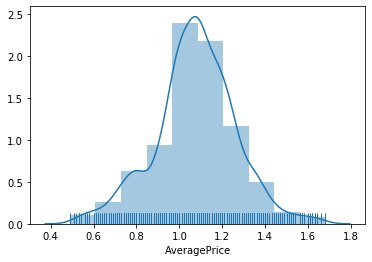

In [24]:
sns.distplot(df_new['AveragePrice'],bins=10,kde=True,rug=True)

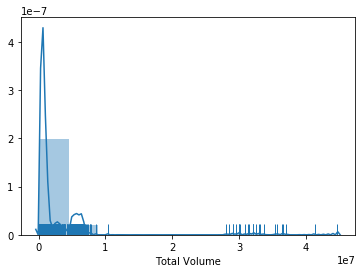

In [25]:
sns.distplot(df_new['Total Volume'],bins=10,kde=True,rug=True)

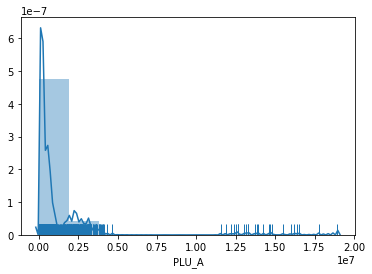

In [26]:
sns.distplot(df_new['PLU_A'],bins=10,kde=True,rug=True)

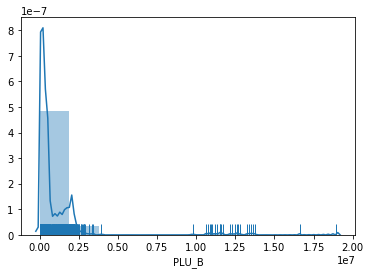

In [27]:
sns.distplot(df_new['PLU_B'],bins=10,kde=True,rug=True)

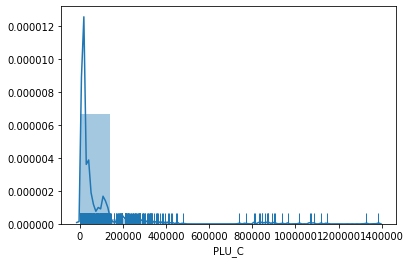

In [28]:
sns.distplot(df_new['PLU_C'],bins=10,kde=True,rug=True)

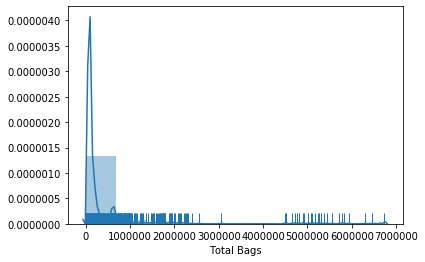

In [29]:
sns.distplot(df_new['Total Bags'],bins=10,kde=True,rug=True)

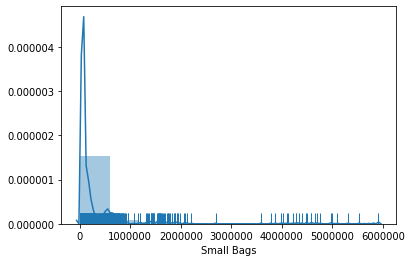

In [30]:
sns.distplot(df_new['Small Bags'],bins=10,kde=True,rug=True)

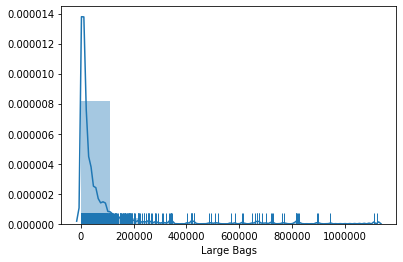

In [31]:
sns.distplot(df_new['Large Bags'],bins=10,kde=True,rug=True)

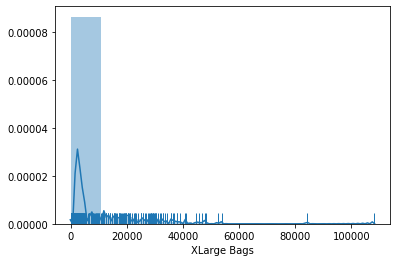

In [32]:
sns.distplot(df_new['XLarge Bags'],bins=10,kde=True,rug=True)

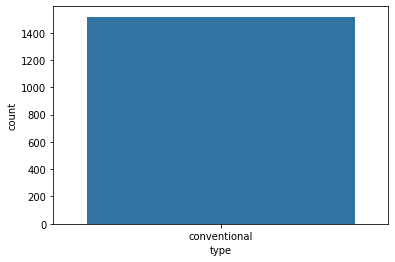

In [33]:
sns.countplot(x=df_new['type'],data=df_new)

In [34]:
df_new['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [35]:
df_new.shape

(1517, 17)

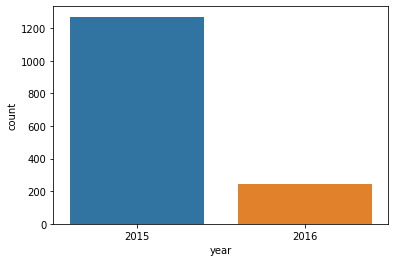

In [36]:
sns.countplot(x=df_new['year'],data=df_new)

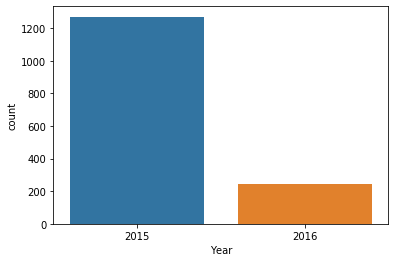

In [37]:
sns.countplot(x=df_new['Year'],data=df_new)

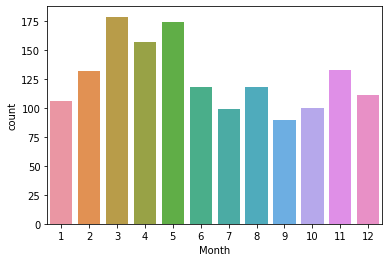

In [38]:
sns.countplot(x=df_new['Month'],data=df_new)

In [39]:
df_new['Month'].value_counts()

3     179
5     174
4     157
11    133
2     132
8     118
6     118
12    111
1     106
10    100
7      99
9      90
Name: Month, dtype: int64

In [40]:
df_new['Nameofweek'].value_counts()

Sunday    1517
Name: Nameofweek, dtype: int64

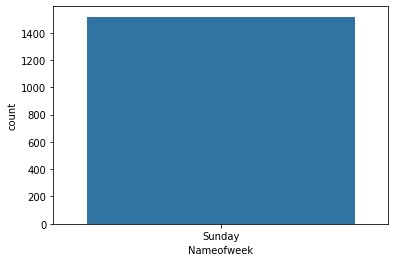

In [41]:
sns.countplot(x=df_new['Nameofweek'],data=df_new)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

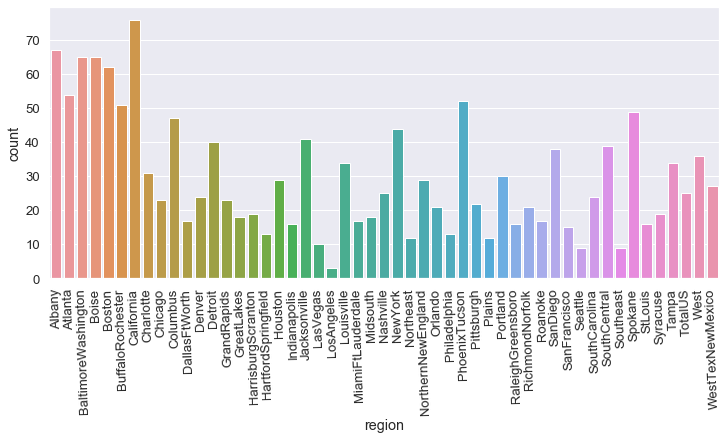

In [42]:
sns.set(font_scale =1.2)
fig=plt.figure(figsize=(12,5))
sns.countplot(x=df_new['region'],data=df_new)
plt.xticks(rotation = 92)

In [43]:
df_new['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

In [44]:
df_new.head()

,Date,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day,Nameofweek
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27,Sunday
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20,Sunday
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13,Sunday
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,6,Sunday
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29,Sunday


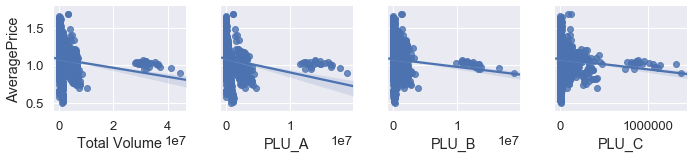

In [45]:
sns.pairplot(data=df_new, x_vars=['Total Volume', 'PLU_A', 'PLU_B', 'PLU_C'],y_vars='AveragePrice',size=2.5, aspect=1, kind='reg')

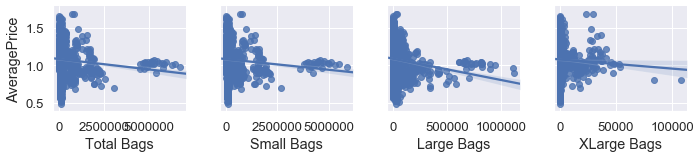

In [46]:
sns.pairplot(data=df_new, x_vars=['Total Bags','Small Bags','Large Bags','XLarge Bags'], y_vars='AveragePrice',size=2.5, aspect=1, kind='reg')

In [47]:
plt.rcParams["axes.labelsize"] = 5

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

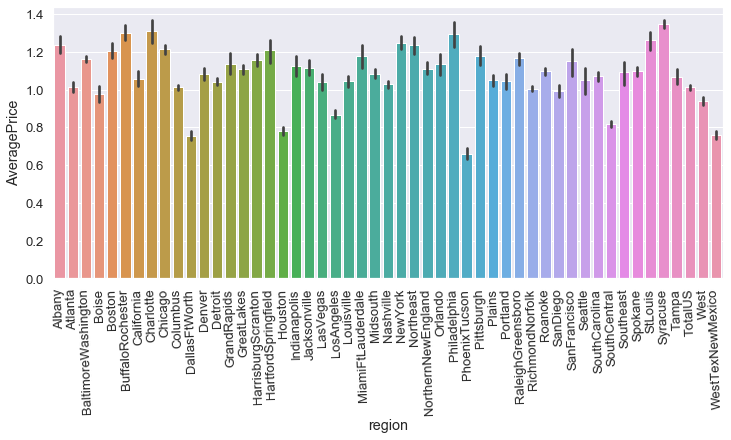

In [48]:
sns.set(font_scale =1.2)
fig=plt.figure(figsize=(12,5))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation = 92)

In [49]:
df_new.corr()

,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.178683,0.066859,0.092531
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.004189,-0.090520,-0.022423
PLU_A,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.040439,-0.090647,-0.018394
PLU_B,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.007254,-0.091329,-0.032709
PLU_C,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.029222,-0.074855,-0.014611
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.090108,-0.081330,-0.009035
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.106382,-0.084376,-0.003583
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.018678,-0.062447,-0.038890
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.218342,0.049232,0.009174
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,1.000000,0.004111,0.023543


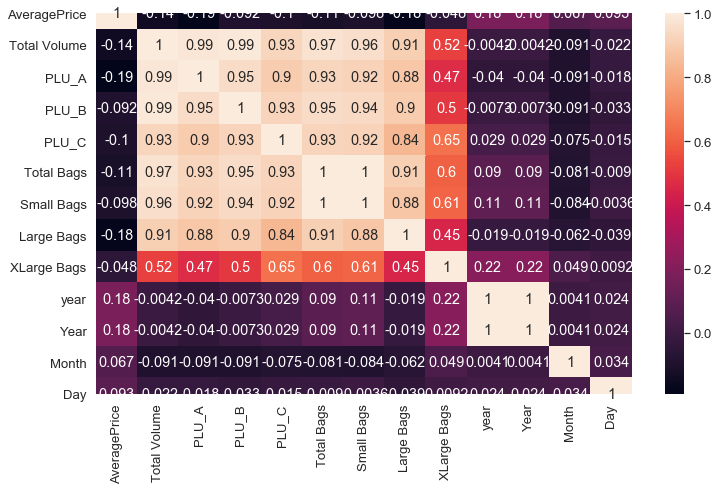

In [50]:
fig=plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(),annot=True)

<Figure size 864x360 with 0 Axes>

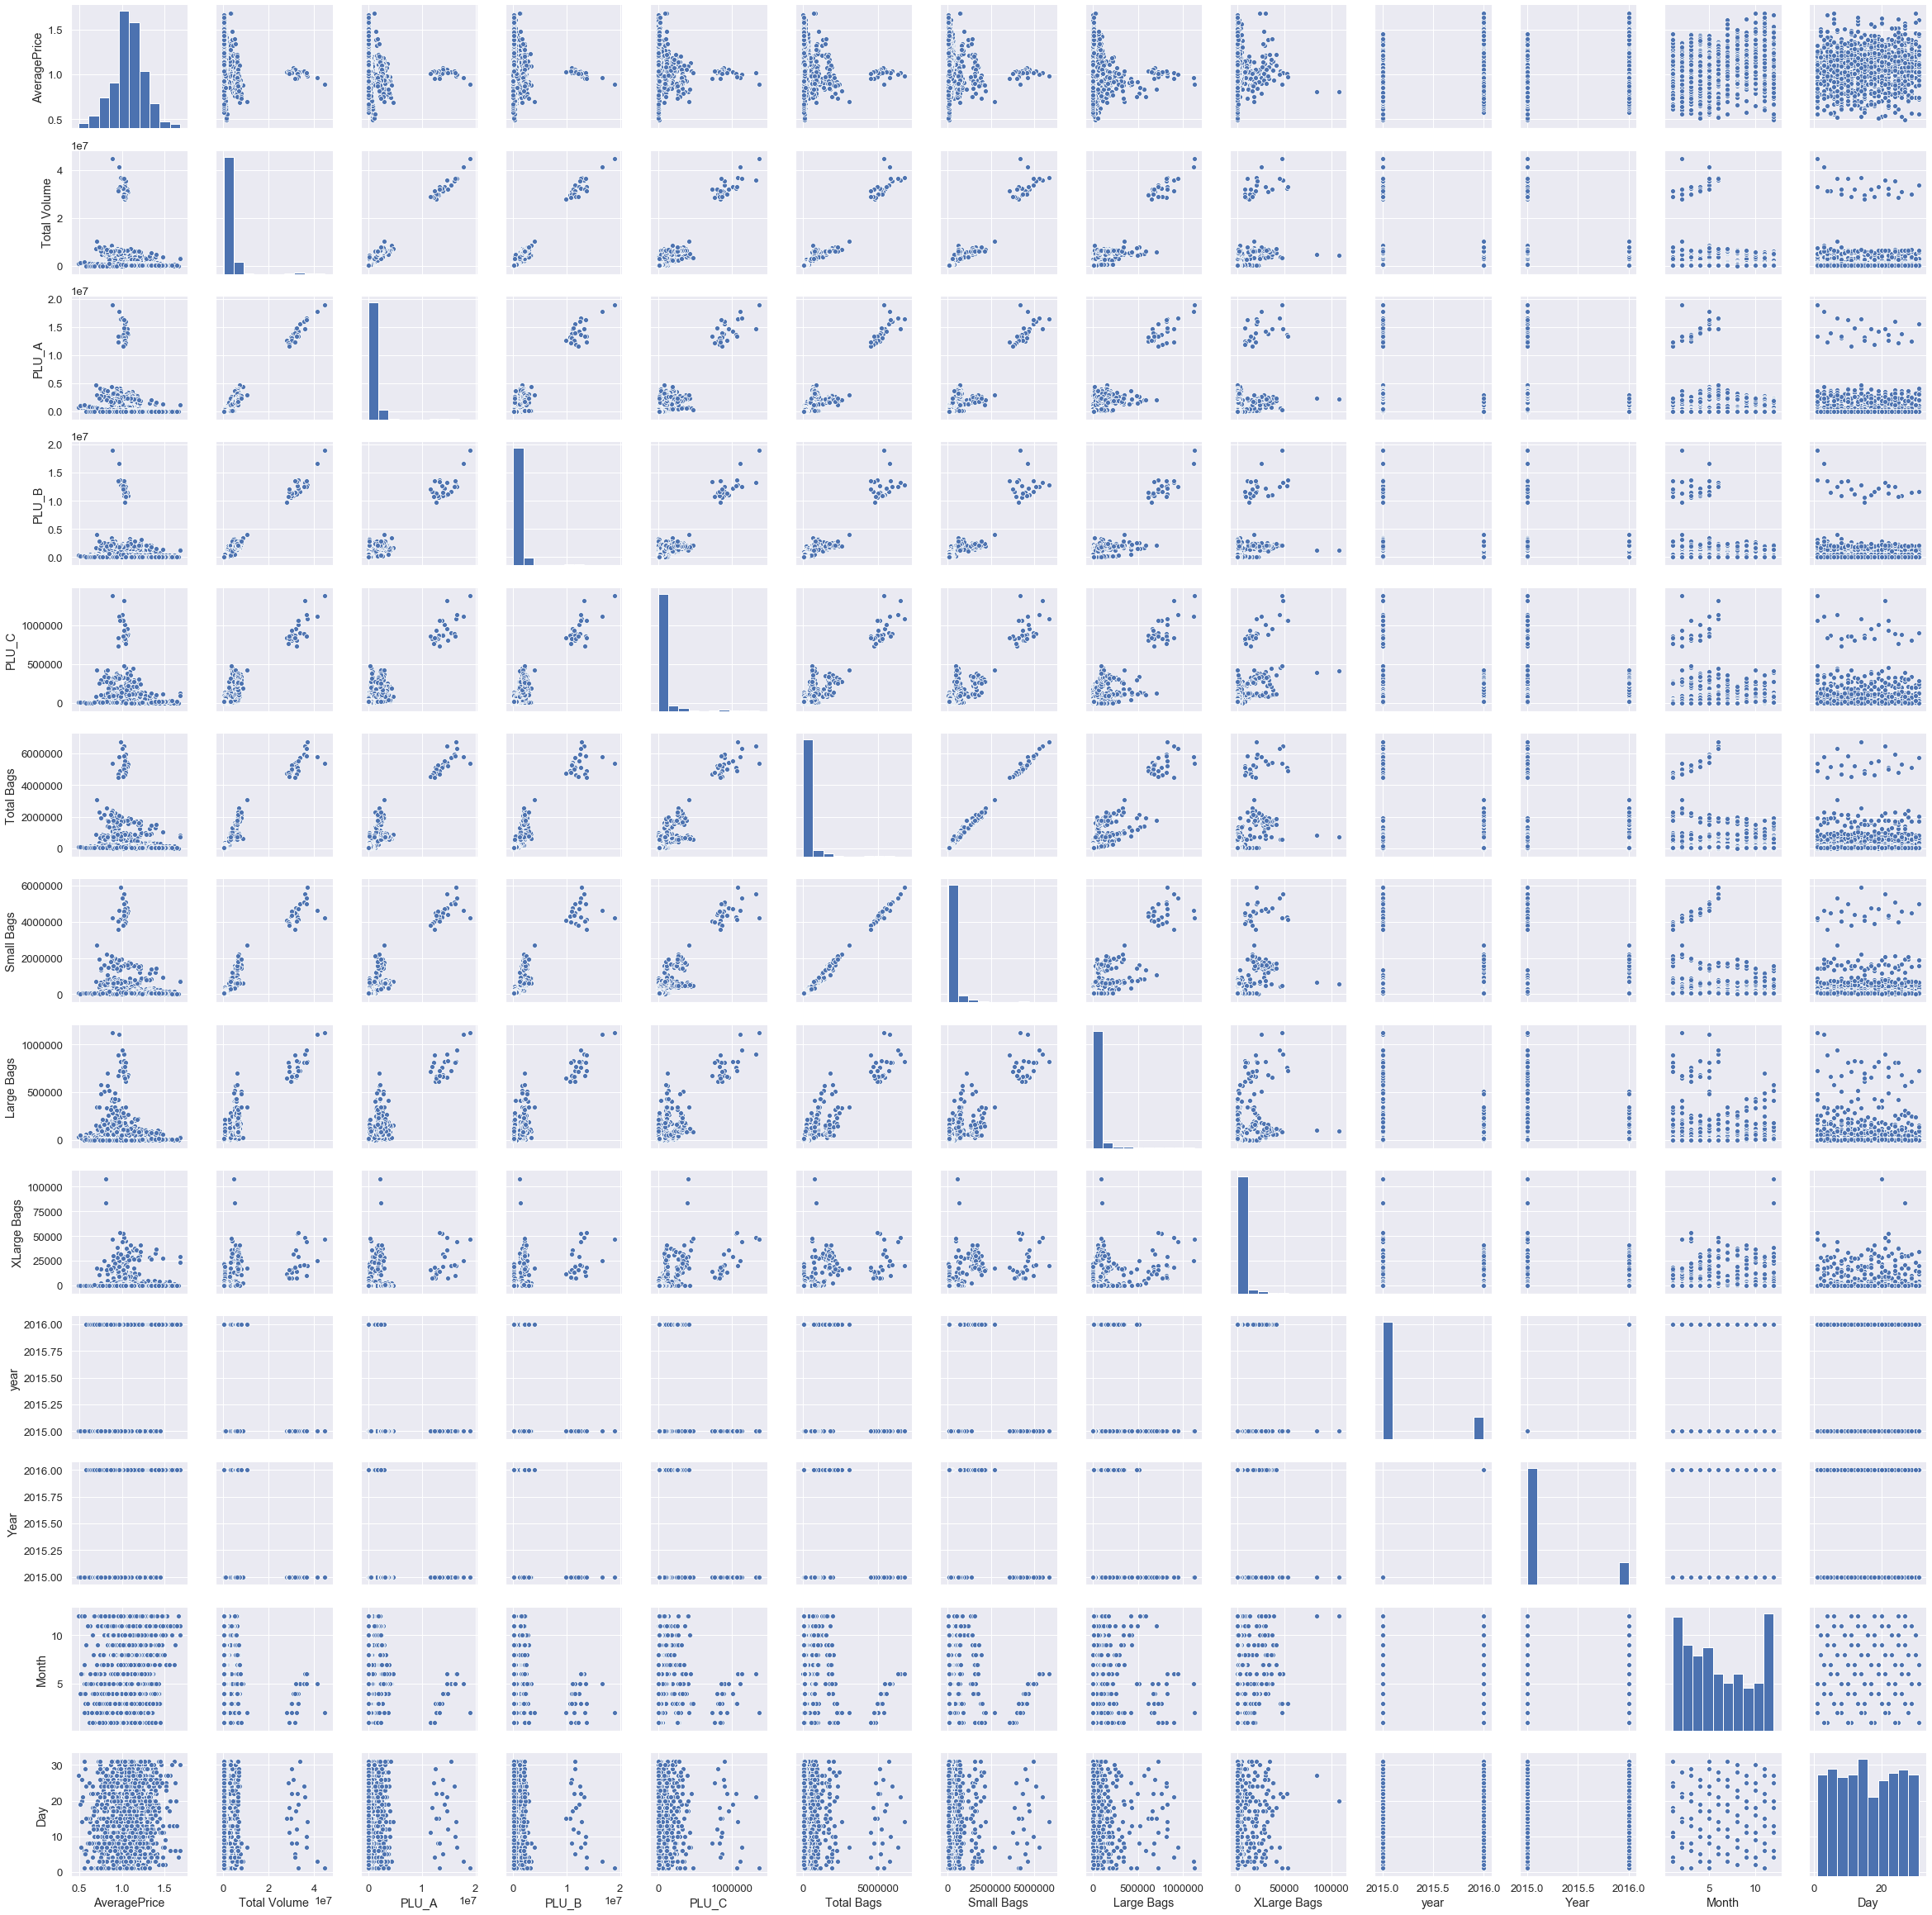

In [51]:
sns.set(font_scale =1.2)
fig=plt.figure(figsize=(12,5))
sns.pairplot(df_new)

In [52]:
df_new.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_A', 'PLU_B', 'PLU_C',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Year', 'Month', 'Day', 'Nameofweek'],
      dtype='object')

In [53]:
df_new['region'].nunique() #for encoding we require 51 new columns(dummy encoding ) or 51 new labelEncoders which can affect model efficiency

51

In [54]:
df_new['type'].value_counts() #can be removed

conventional    1517
Name: type, dtype: int64

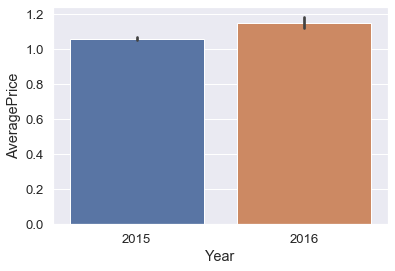

In [55]:
sns.barplot(x='Year', y='AveragePrice', data=df_new) #Year can be removed as AveragePrice is almost same

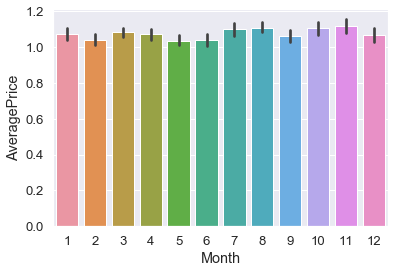

In [56]:
sns.barplot(x='Month', y='AveragePrice', data=df_new) #month can be removed as Averageprice is almost same

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

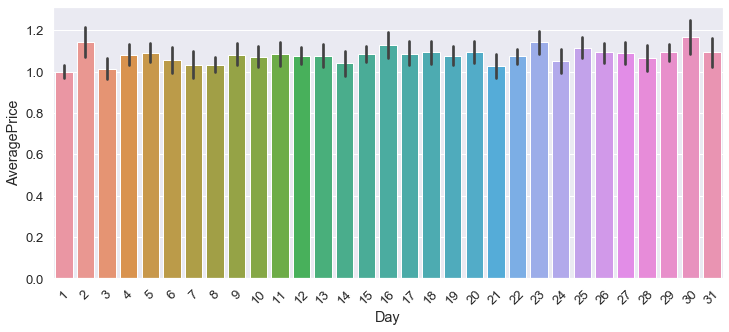

In [57]:
fig=plt.figure(figsize=(12,5)) #day can be removed as AveragePrice is almost same
sns.barplot(x='Day', y='AveragePrice', data=df_new)
plt.xticks(rotation=45)

In [58]:
df1_new1=df_new

In [59]:
df1_new1.head()

,Date,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day,Nameofweek
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27,Sunday
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20,Sunday
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13,Sunday
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,6,Sunday
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29,Sunday


In [60]:
df1_new1.drop(columns=['Date','type','year','Year','Month','Day','Nameofweek'],axis=1, inplace=True)

In [61]:
df1_new1.head()

,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


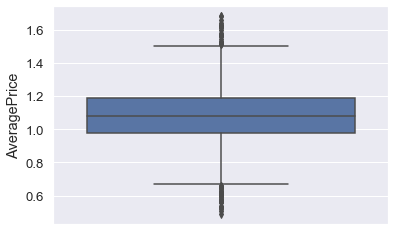

In [62]:
#checcking outliers
sns.boxplot(y='AveragePrice', data=df1_new1)

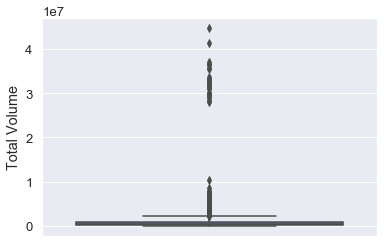

In [63]:
sns.boxplot(y='Total Volume', data=df1_new1)

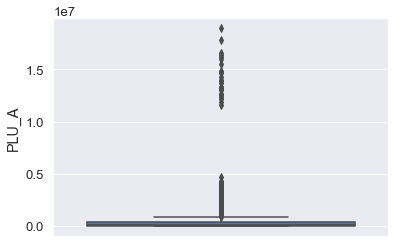

In [64]:
sns.boxplot(y='PLU_A', data=df1_new1)

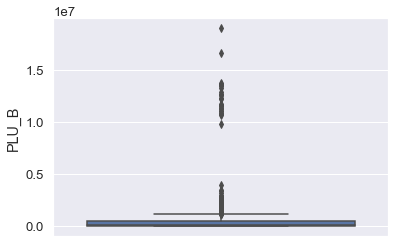

In [65]:
sns.boxplot(y='PLU_B', data=df1_new1)

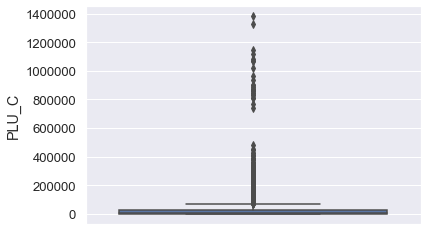

In [66]:
sns.boxplot(y='PLU_C', data=df1_new1)

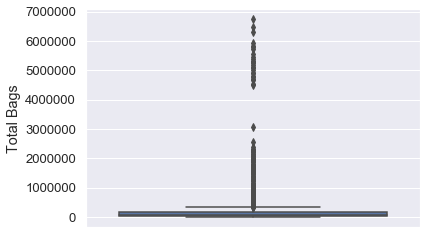

In [67]:
sns.boxplot(y='Total Bags', data=df1_new1)

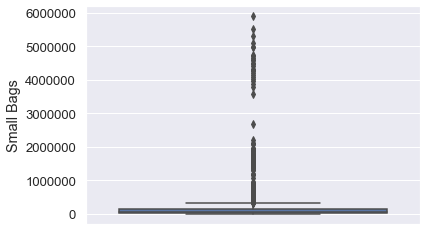

In [68]:
sns.boxplot(y='Small Bags', data=df1_new1)

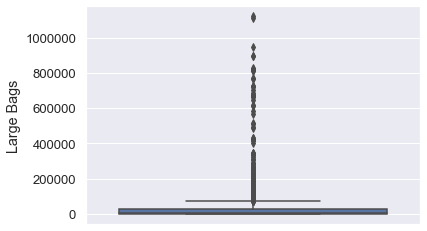

In [69]:
sns.boxplot(y='Large Bags', data=df1_new1)

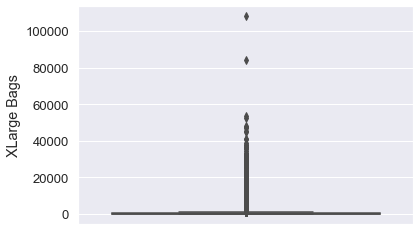

In [70]:
sns.boxplot(y='XLarge Bags', data=df1_new1)

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le=LabelEncoder()

In [73]:
df1_new1['region']=le.fit_transform(df1_new1['region'])

In [74]:
df1_new1.head()

,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [75]:
df1_new1.skew()

AveragePrice   -0.109444
Total Volume    6.200138
PLU_A           6.051830
PLU_B           6.394926
PLU_C           5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
region          0.288146
dtype: float64

In [76]:
for x in df1_new1.columns:
    if df1_new1.skew().loc[x]>0.55:
        df1_new1[x]=np.log1p(df1_new1[x])

In [77]:
df1_new1.skew() #skew check

AveragePrice   -0.109444
Total Volume    0.667468
PLU_A          -0.160268
PLU_B           0.184436
PLU_C          -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
region          0.288146
dtype: float64

In [78]:
for x in df1_new1.columns:
    if df1_new1.skew().loc[x]<-0.55:
        df1_new1[x]=np.power(df1_new1[x],3)

In [79]:
df1_new1.skew() #removed all skewness

AveragePrice   -0.109444
Total Volume    0.667468
PLU_A          -0.160268
PLU_B           0.184436
PLU_C          -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags      0.836224
XLarge Bags     0.783913
region          0.288146
dtype: float64

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
PLU_A           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
PLU_B           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
PLU_C           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
region             AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

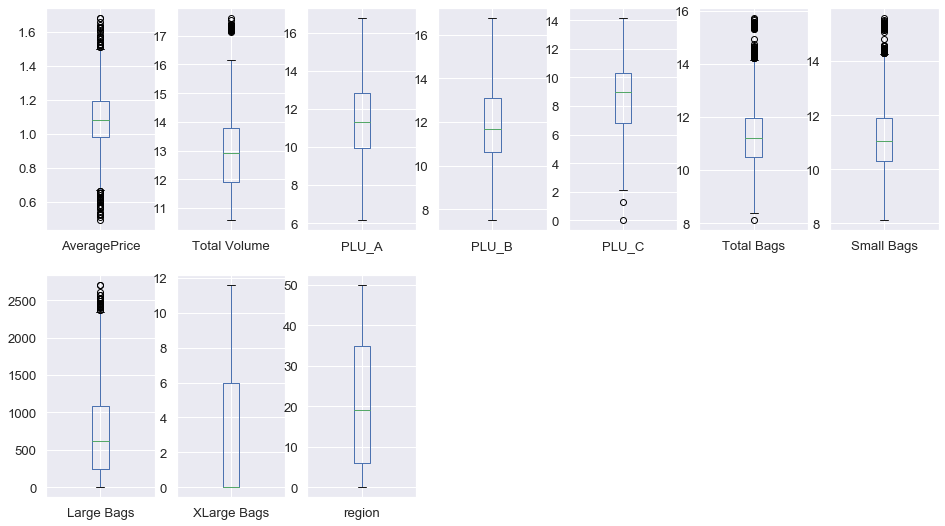

In [80]:
df1_new1.plot(kind='box',subplots=True,layout=(2,7),figsize=(16,9))

Let's remove outliers present

In [81]:
from scipy.stats import zscore

In [82]:
z_score=abs(zscore(df1_new1))
df1_new1.shape

(1517, 10)

In [83]:
df_final=df1_new1.loc[(z_score<3).all(axis=1)]

In [84]:
df_final.shape

(1497, 10)

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
PLU_A           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
PLU_B           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
PLU_C           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
region             AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

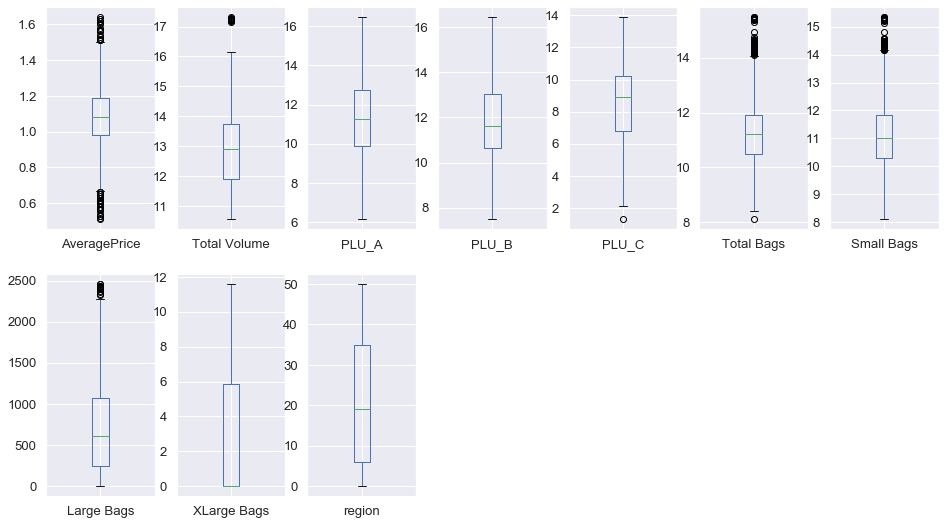

In [85]:
df_final.plot(kind='box',subplots=True,layout=(2,7),figsize=(16,9))

In [86]:
df_final.skew()

AveragePrice   -0.152108
Total Volume    0.551984
PLU_A          -0.225471
PLU_B           0.088374
PLU_C          -0.386676
Total Bags      0.584839
Small Bags      0.609978
Large Bags      0.714670
XLarge Bags     0.804162
region          0.298778
dtype: float64

In [87]:
X=df_final.drop(columns='AveragePrice',axis=1)
y=df_final['AveragePrice']

In [88]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [89]:
MN=MinMaxScaler()
Sc=StandardScaler()

In [90]:
X_scaled=MN.fit_transform(X)
X_scaled

array([[0.07491039, 0.07716309, 0.38198425, ..., 0.03823226, 0.        ,
        0.        ],
       [0.05156979, 0.03544805, 0.35977168, ..., 0.03935329, 0.        ,
        0.        ],
       [0.16531755, 0.05137928, 0.45969072, ..., 0.04080556, 0.        ,
        0.        ],
       ...,
       [0.22631394, 0.44604107, 0.37873299, ..., 0.29856726, 0.5794879 ,
        0.14      ],
       [0.23496286, 0.46103991, 0.38020264, ..., 0.29880872, 0.        ,
        0.14      ],
       [0.23006063, 0.43898934, 0.38144646, ..., 0.33404239, 0.        ,
        0.14      ]])

In [91]:
(pd.DataFrame(X_scaled)).skew()

0    0.551984
1   -0.225471
2    0.088374
3   -0.386676
4    0.584839
5    0.609978
6    0.714670
7    0.804162
8    0.298778
dtype: float64

In [92]:
X1_scaled=Sc.fit_transform(X)
X1_scaled

array([[-1.38512592, -1.84544756, -0.55869996, ..., -1.10126672,
        -0.80225979, -1.31147677],
       [-1.499648  , -2.03350781, -0.67925447, ..., -1.09628957,
        -0.80225979, -1.31147677],
       [-0.94153768, -1.96168644, -0.13696286, ..., -1.08984177,
        -0.80225979, -1.31147677],
       ...,
       [-0.6422552 , -0.18246744, -0.57634557, ...,  0.05456784,
         1.14717036, -0.87357959],
       [-0.59981874, -0.11484947, -0.56836931, ...,  0.05563988,
        -0.80225979, -0.87357959],
       [-0.62387184, -0.21425813, -0.56161874, ...,  0.21207023,
        -0.80225979, -0.87357959]])

In [93]:
(pd.DataFrame(X1_scaled)).skew()

0    0.551984
1   -0.225471
2    0.088374
3   -0.386676
4    0.584839
5    0.609978
6    0.714670
7    0.804162
8    0.298778
dtype: float64

In [94]:
X1=pd.DataFrame(data=X_scaled,index=None,columns=X.columns)

In [95]:
X1.shape

(1497, 9)

In [96]:
X1.head()

,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,0.074910,0.077163,0.381984,0.206558,0.130829,0.131974,0.038232,0.0,0.0
1,0.051570,0.035448,0.359772,0.221494,0.142878,0.144331,0.039353,0.0,0.0
2,0.165318,0.051379,0.459691,0.284716,0.121950,0.122645,0.040806,0.0,0.0
3,0.105557,0.085689,0.413159,0.238593,0.076192,0.074508,0.047981,0.0,0.0
4,0.040825,0.067815,0.357750,0.241975,0.084618,0.081831,0.060305,0.0,0.0


In [97]:
y1=pd.DataFrame(y)

In [98]:
y1.shape

(1497, 1)

In [99]:
y1.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [100]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
#from sklearn.linear_model import LinearRegression

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
train_X,test_X,train_y,test_y=train_test_split(X1,y1,test_size=.30,random_state=112)

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [105]:
LR=LinearRegression()
DTR=DecisionTreeRegressor(random_state=7)
KN=KNeighborsRegressor(n_neighbors=7)
SVMR=SVR()
RFR=RandomForestRegressor(n_estimators=12,max_depth=12)
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()

In [106]:
model_list=[]

In [107]:
model_list.append(('LinearRegression', LR))

In [108]:
model_list.append(('DecisionTreeRegressor', DTR))

In [109]:
model_list.append(('KNeighborsRegressor', KN))

In [110]:
model_list.append(('SVR', SVMR))

In [111]:
model_list.append(('RandomForestRegressor', RFR))

In [112]:
model_list.append(('AdaBoostingRegressor', ABR))

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
Model=[]
MAE=[]
MSA=[]
CS=[]
r2_scor=[]

for name,model in model_list:
    print('**************************************',name,'***********************************************')
    Model.append(name)
    model.fit(train_X,train_y)
    print(model)
    pred=model.predict(test_X)
    print('\n')
    Abs=mean_absolute_error(pred,test_y)
    print('mean absolue error is:',Abs)
    MAE.append(Abs*100)
    print('\n')
    ms=mean_squared_error(pred,test_y)
    print('mean squared error is:',ms)
    MSA.append(ms*100)
    print('\n')
    cs=cross_val_score(model,X=train_X,y=train_y, cv=10,scoring='r2').mean()
    print('cross_val is',cs)
    CS.append(cs*100)
    print('\n')
    r=r2_score(pred,test_y)
    print('r2_scor is :',r)
    r2_scor.append(r*100)
    

************************************** LinearRegression ***********************************************
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


mean absolue error is: 0.107972594091458


mean squared error is: 0.019366238708256173


cross_val is 0.3700650547370442


r2_scor is : -0.44963939392162056
************************************** DecisionTreeRegressor ***********************************************
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=7, splitter='best')


mean absolue error is: 0.06797777777777778


mean squared error is: 0.009612666666666665


cross_val is 0.6068439364698486


r2_scor is : 0.7141263873696164
***********************************

In [115]:
best_model=pd.DataFrame({'Model': Model,'Mean Absolute Error': MAE,'Mean Squared Error': MSA,
                         'CV_Score':CS,'R2_score':r2_scor})

In [116]:
best_model

,Model,Mean Absolute Error,Mean Squared Error,CV_Score,R2_score
0,LinearRegression,10.797259,1.936624,37.006505,-44.963939
1,DecisionTreeRegressor,6.797778,0.961267,60.684394,71.412639
2,KNeighborsRegressor,6.452063,0.727089,71.504001,70.957446
3,SVR,10.110120,1.740493,40.079803,-51.858474
4,RandomForestRegressor,5.687746,0.569629,76.858379,77.406544
5,AdaBoostingRegressor,9.416924,1.324240,56.610506,18.793105


Choosing Decission Tree Regressor for final model as it has least MSE,MAE and aversge R2_core

In [117]:
#using gridsearchcv to tune parameters of Decission Tree Regressor
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = {
               'criterion' : ['mse','mae'],
                'random_state' : [7,10,13,15],
                 'max_depth' : [5,10,12,15,200]
              }

In [119]:
grid_search=GridSearchCV(estimator= DTR,param_grid= param_grid,
                        scoring='r2', cv=10, n_jobs=-1)

In [120]:
grid_search=grid_search.fit(train_X,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [121]:
score=grid_search.best_score_

In [122]:
score

0.6183302622221876

In [123]:
grid_search.best_params_

{'criterion': 'mae', 'max_depth': 15, 'random_state': 7}

performance is best at random_state=7,max_depth= None,criterion='mse' without tunning as used by me at initial. I will save that.

In [124]:
#saving the model
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [125]:
joblib.dump(DTR,'DTRavocado_joblib')

['DTRavocado_joblib']

# For Classifier

In [126]:
df1_new1.head()

,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,93.945115,0.0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,96.699736,0.0,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,100.268293,0.0,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,117.900955,0.0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,148.182503,0.0,0


In [127]:
df1_new1['region'].value_counts()

6     76
0     67
2     65
3     65
4     62
1     54
31    52
5     51
44    49
9     47
26    44
19    41
12    40
42    39
38    38
49    36
22    34
47    34
7     31
34    30
28    29
17    29
50    27
25    25
48    25
11    24
41    24
8     23
13    23
32    22
29    21
36    21
15    19
46    19
24    18
14    18
10    17
37    17
23    17
18    16
35    16
45    16
39    15
30    13
16    13
27    12
33    12
20    10
43     9
40     9
21     3
Name: region, dtype: int64

In [128]:
df_final.skew()

AveragePrice   -0.152108
Total Volume    0.551984
PLU_A          -0.225471
PLU_B           0.088374
PLU_C          -0.386676
Total Bags      0.584839
Small Bags      0.609978
Large Bags      0.714670
XLarge Bags     0.804162
region          0.298778
dtype: float64

In [129]:
X5=df_final.drop(columns='region',axis=1)
y5=df_final['region']


In [130]:
X5.head()

,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,93.945115,0.0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,96.699736,0.0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,100.268293,0.0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,117.900955,0.0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,148.182503,0.0


In [131]:
y5.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [132]:
y5=pd.DataFrame(y5)

In [133]:
y5.head()

,region
0,0
1,0
2,0
3,0
4,0


In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
Sc=StandardScaler()

In [136]:
X_scaled=Sc.fit_transform(X5)

In [137]:
X5=pd.DataFrame(data=X_scaled,index=None,columns=X5.columns)

In [138]:
X5.head()

,AveragePrice,Total Volume,PLU_A,PLU_B,PLU_C,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.362328,-1.385126,-1.845448,-0.558700,-1.829742,-1.726399,-1.573539,-1.101267,-0.80226
1,1.469252,-1.499648,-2.033508,-0.679254,-1.755187,-1.658952,-1.506487,-1.096290,-0.80226
2,-0.776142,-0.941538,-1.961686,-0.136963,-1.439621,-1.776097,-1.624158,-1.089842,-0.80226
3,0.025784,-1.234755,-1.807009,-0.389504,-1.669839,-2.032232,-1.885360,-1.057982,-0.80226
4,1.095019,-1.552366,-1.887590,-0.690228,-1.652960,-1.985069,-1.845624,-1.003269,-0.80226


In [139]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X5,y5,test_size=.30,random_state=101)

In [143]:
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=7)
KN=KNeighborsClassifier(n_neighbors=10)
NBG=GaussianNB()
SVMC=SVC()
RFC=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=1000)
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [144]:
model_list=[]

In [145]:
model_list.append(('LogisticRegression', LR))

In [146]:
model_list.append(('DecisionTreeClassifier', DTC))

In [147]:
model_list.append(('KNeighborsClassifier', KN))

In [148]:
model_list.append(('GaussianNB', NBG))

In [149]:
model_list.append(('SVC', SVMC))

In [150]:
model_list.append(('RandomForestClassifier', RFC))

In [151]:
model_list.append(('GradientBoostingClassifier', GBC))

In [152]:
model_list.append(('AdaBoostingClassifier', ABC))

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
Model=[]
accuracy=[]
CS=[]

for name,model in model_list:
    print('*********************',name,'*****************')
    Model.append(name)
    model.fit(X1_train,y1_train)
    print(model)
    pred1=model.predict(X1_test)
    print('\n')
    AS=accuracy_score(pred1,y1_test)
    print('accuracy is',AS)
    accuracy.append(AS*100)
    print('\n')
    cs=cross_val_score(model,X=X1_train,y=y1_train, cv=10,scoring='accuracy').mean()
    print('cross_val is',cs)
    CS.append(cs*100)
    print('\n')
    print('classification_report:', classification_report(y1_test,pred1))
    print('\n')
    print('confusion_matrix:', confusion_matrix(y1_test,pred1))
    print('\n\n')


********************* LogisticRegression *****************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy is 0.7488888888888889


cross_val is 0.7315559719103989


classification_report:               precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.56      0.88      0.68        16
           2       0.90      0.90      0.90        21
           3       0.78      0.86      0.82        21
           4       0.72      0.86      0.78        21
           5       0.67      1.00      0.80        18
           6       0.57      0.95      0.71        22
           7       0.67      1.00      0.80         6
           8       1.00      1.00    

cross_val is 0.9190583510542044


classification_report:               precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.78      0.88      0.82        16
           2       1.00      1.00      1.00        21
           3       0.95      0.90      0.93        21
           4       1.00      0.71      0.83        21
           5       0.72      1.00      0.84        18
           6       0.92      1.00      0.96        22
           7       1.00      0.33      0.50         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        11
          10       0.71      1.00      0.83         5
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00         4
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         6
          16       1.00 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


accuracy is 0.8711111111111111


cross_val is 0.8527552303381754


classification_report:               precision    recall  f1-score   support

           0       1.00      0.74      0.85        23
           1       0.88      0.94      0.91        16
           2       0.88      1.00      0.93        21
           3   

In [155]:
best_model=pd.DataFrame({'Model': Model,'Accuracy':accuracy,'CV_Score':CS})
best_model

,Model,Accuracy,CV_Score
0,LogisticRegression,74.888889,73.155597
1,DecisionTreeClassifier,86.222222,86.493393
2,KNeighborsClassifier,87.777778,90.228368
3,GaussianNB,89.777778,91.905835
4,SVC,90.000000,91.997377
5,RandomForestClassifier,96.222222,95.550905
6,GradientBoostingClassifier,87.111111,85.275523
7,AdaBoostingClassifier,9.111111,11.025235


I will go for Random Forest as Accuracy is high and Cross val score is also good

In [156]:
#Choosing best hyper parameters of RandomForest initial I have tune to n_estimators:12,max_depth:12
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[7,12,15,20,100], 'criterion':['gini'],'max_depth': [10,12,20,100,1000]},
            {'n_estimators':[7,12,15,20,100],'criterion':['entropy'], 'max_depth':[10,12,20,100,1000]}]
grid_search=GridSearchCV(estimator= RFC,param_grid= parameters,
                        scoring='accuracy', cv=10, n_jobs=-1)

In [157]:
grid_search=grid_search.fit(X1_train,y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [158]:
accuracy_grid= grid_search.best_score_
accuracy_grid

0.9579751671442216

In [159]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100}

In [160]:
#saving the model
from sklearn.externals import joblib

In [161]:
joblib.dump(RFC,'RFCavocado_joblib')

['RFCavocado_joblib']